# 시험문제

In [85]:
# 본인의 성함을 출력하세요. 예:
print("저는 %s입니다." % "안승보")
print("저의 점수는 %d입니다." % 80 )

저는 안승보입니다.
저의 점수는 80입니다.


In [11]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

### 문제 1. 구구단 출력함수 작성하기
아래와 같이 구구단을 출력하는 코드가 있다.

In [3]:
list99 = []
for j in range(1, 10):
    l = []
    for i in range(1, 10):
        l.append(i*j)
    list99.append(l)
print(list99)

[[1, 2, 3, 4, 5, 6, 7, 8, 9], [2, 4, 6, 8, 10, 12, 14, 16, 18], [3, 6, 9, 12, 15, 18, 21, 24, 27], [4, 8, 12, 16, 20, 24, 28, 32, 36], [5, 10, 15, 20, 25, 30, 35, 40, 45], [6, 12, 18, 24, 30, 36, 42, 48, 54], [7, 14, 21, 28, 35, 42, 49, 56, 63], [8, 16, 24, 32, 40, 48, 56, 64, 72], [9, 18, 27, 36, 45, 54, 63, 72, 81]]


이를 참고하여, 다음과 같은 결과를 프린트하는 함수 f99를 작성하라.
```
f99(3)
[3, 6, 9, ..., 27]

f99([4, 7])
[4, 8, 12, ..., 36]
[7, 14, 31, ..., 63]

f99(21)
0보다 크고 10보다 작은 값을 입력하세요.

f99([10, 7])
0보다 크고 10보다 작은 값을 입력하세요.
[7, 14, 31, ..., 63]
```

아래 코드를 참고하여 :

In [8]:
z = 5
y = [3, 4]
x = y
from collections.abc import Iterable
if isinstance(x, Iterable):
    for i in x:
        print(i)
else:
    print(x)

3
4


1. 2단, 7단 등을 출력하는 print99 함수를 만들고,
2. 예외처리를 하고, print99를 이용하여 최종처리를 하는 f99를 완성하세요.

In [3]:
def print99(x):
    xlist = []
    # 아래 사항을 완성하세요.
    for i in range(1,10):
        xlist.append(x*i)
    print(xlist)

def f99(x):
    errorstring = "0보다 크고 10보다 작은 값을 입력하세요."
    # 아래 사항을 완성하세요.
    from collections.abc import Iterable # Iterable 검사.
    if isinstance(x, Iterable):
        for i in x:
            if 0<i<10:
                print99(i)
            else:
                print(errorstring)
    else:
        if 0<x<10:
            print99(x)
        else:
            print(errorstring) 

In [56]:
print99(2)
print99(7)

[2, 4, 6, 8, 10, 12, 14, 16, 18]
[7, 14, 21, 28, 35, 42, 49, 56, 63]


In [57]:
f99(3)
f99([4, 7])
f99(21)
f99([10, 7])

[3, 6, 9, 12, 15, 18, 21, 24, 27]
[4, 8, 12, 16, 20, 24, 28, 32, 36]
[7, 14, 21, 28, 35, 42, 49, 56, 63]
0보다 크고 10보다 작은 값을 입력하세요.
0보다 크고 10보다 작은 값을 입력하세요.
[7, 14, 21, 28, 35, 42, 49, 56, 63]


### 문제2
리스트 x와 값 v를 받아서 v의 약수가 되는 모든 리스트 x의 성분을 담은 리스트를 출력하는 factors 함수를 작성하라. 만약 없다면 -1을 리턴하라.

즉:
```
factors([4, 9, 21, 7], 3)
[9, 21]

factors([4, 9, 21, 7], 11)
-1
```

우리가 작성한 seqsearchall 함수를 참고하라.
```python
def seqsearchall(l, target):
    ret = []
    isnot = 0
    for i in range(len(l)):
        if l[i] == target:
            ret.append(i)
            isnot = 1
        elif l[i] > target:
            if isnot == 1: return ret
            else: return -1
    return -1
```

In [74]:
1 % 3 == [1, 2]

False

In [80]:
def factors(x, v):
    ret = []
    isnot = 0
    for i in range(len(x)):
        if x[i] % v == 0:
            ret.append(x[i])
            isnot = 1
        elif x[i] % v != 0: 
            if isnot == 1 : return ret
            else: return -1
    return -1

In [81]:
factors([4, 9, 21, 7], 3)

-1

In [79]:
factors([4, 9, 21, 7], 11)

-1

### 문제 3
2장에서 movielens에서 우리는 여성이 높게 평가한 영화 상위 10개와 남성이 높게 평가한 영화 상위 10개를 찾아 내었다.

우리는 여성이 높게 평가한 영화 100개와 남성이 높게 평가한 상위 100개에 대해, 공통되는 영화를 추출하여 아래와 같은 표를 출력하라.

|title|F|M|All|Rank|
|---|---|---|---|---|
|...|Fscore|Mscore|All|1|
|...|Fscore|Mscore|All|2|

In [6]:
import pandas as pd
import os
encoding = 'latin1'
# encoding = "utf-8"

upath = os.path.expanduser('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch02/movielens/users.dat')
rpath = os.path.expanduser('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch02/movielens/ratings.dat')
mpath = os.path.expanduser('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying e

In [7]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

female = mean_ratings['F'].sort_values(ascending = False)[:100]
male = mean_ratings['M'].sort_values(ascending = False)[:100]

In [9]:
result = pd.concat([female, male], axis = 1, join = 'inner')
result

,F,M
title,,
Lamerica (1994),5.000000,4.666667
I Am Cuba (Soy Cuba/Ya Kuba) (1964),5.000000,4.750000
"Gate of Heavenly Peace, The (1995)",5.000000,5.000000
"Apple, The (Sib) (1998)",4.750000,4.600000
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Pather Panchali (1955),4.571429,4.333333


### 문제 4
slicing은 i:j와 같은 방법으로 연속된 색인을 사용한다.
![](http://i.imgur.com/nLqL1yM.png)


3d array의 shape이 (l, m, n)일 때 shape을 예측해보자:
1. arr3d[i]
- arr3d[i:j]
- arr3d[:j]
- arr3d[i:]
- arr3d[:-j]
- arr3d[:, i]
- arr3d[:, i:j]
- arr3d[0, i:j]
- arr3d[:, :, i]
- arr3d[:, :, i:j]
- arr3d[1, :, i]
- arr3d[1, :, i:j]
- arr3d[1, 2:, i]
- arr3d[1, 2, i:j]
- arr3d[:, 2, i]
- arr3d[:, 2, i:j]

l x m x n
1. (m, n)
2. (j-i, m, n)
3. (j, m, n)
-  (l-i, m, n)
-  (l-j, m, n)
-  (l, n)
-  (l, j-i, n)
-  (j-i, n)
-  (l, m)
-  (l, m, j-i)
-  (m)
-  (m, j-i)
-  (m-2)
-  (j-i)
-  (l)
-  (l, j-i)

### 문제 5
임의의 0 ~ 99의 정수 값을 갖는 5 x 5 shape의 array를 생성하고 열 평균과 행 평균, 대각성분의 평균을 구하시오.

In [110]:
# array 생성하고 열, 행, 대각성분 평균 구하기

In [111]:
import numpy as np

In [18]:
arr = np.array([np.random.randint(100) for i in range(25)]).reshape(5, 5)
arr

array([[98, 29,  1, 36, 41],
       [34, 29,  1, 59, 14],
       [91, 80, 73, 11, 77],
       [10, 81, 82, 38,  7],
       [43, 23, 29, 56, 55]])

In [19]:
# 열평균
arr.mean(0)

array([55.2, 48.4, 37.2, 40. , 38.8])

In [20]:
# 행평균
arr.mean(1)

array([41. , 27.4, 66.4, 43.6, 41.2])

In [21]:
# 대각성분의 평균
arr.trace() / 5

58.6

### 문제 6


excel_exam.xlsx 파일을 이용하여 반별 과목별 평균을 구하고, 반별 과목별로 전체 과목 평균보다 낮은 학생 id를 출력하라.


| class | math | english | science |
|-------|------|---------|---------|
| 1     | 2    | 1       | 3       |
| 1     | 1    | 4       | NaN     |
| 1     | NaN  | 2       | NaN     |
| 2     | 8    | 7       | 6       |
| 2     | 7    | 6       | 5       |

- 평균보다 높은 학생의 수는 절반일 수도, 그 보다 높거나, 낮을 수 있다.

In [62]:
path_6 = 'C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/강의자료/excel_exam.xlsx'

def stu_id(path):
    data = pd.read_excel(path) # excel 불러오기
    df = data.pivot_table(index=['class', 'id']) # data pivot
    df2 = df.groupby(level = 0) # groupby
    result = pd.DataFrame(df2.apply(lambda x: x[x < x.mean()].fillna(' '))) # apply에 함수 적용
    return result

In [63]:
result = stu_id(path_6)
result

english math science
class id                     
1     1                    50
      2                    60
      3       86   45        
      4            30      58
2     5       80   25        
      6            50        
      7                    45
      8       78           25
3     9            20      15
      10                     
      11      65             
      12      85           32
4     13           46        
      14           48      12
      15      56             
      16                     
5     17      68   65        
      18                     
      19      68             
      20                   58

In [14]:
tips = pd.read_csv('C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch08/tips.csv')
tip_group=tips.groupby(['sex','time'])
tip_group

In [15]:
tip_sum=tip_group[['total_bill','tip']].sum()
tip_sum

total_bill     tip
sex    time                      
Female Dinner      999.08  156.11
       Lunch       571.87   90.40
Male   Dinner     2661.22  389.96
       Lunch       595.60   95.11

In [16]:
tipbybill=tip_sum['tip']/tip_sum['total_bill']
tipbybill

sex     time  
Female  Dinner    0.156254
        Lunch     0.158078
Male    Dinner    0.146534
        Lunch     0.159688
dtype: float64

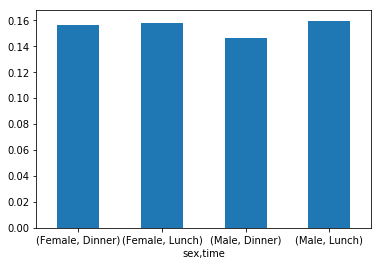

In [17]:
tipbybill.plot(kind='bar',rot=0)

### 문제 8
11장 주가 데이터를 이용하여 월간 수익률을 구하고, 2000년 한 해 동안 월간 수익률 평균이 가장 낮은 종목과 월을 찾아라.

In [22]:
path_8 = 'C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch11/stock_px.csv'

close_px = pd.read_csv(path_8, parse_dates=True, index_col='Unnamed: 0')
close_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [23]:
rate_px = (close_px / close_px.shift(1) - 1).dropna()
rate_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-02,0.012048,0.017812,0.000000,0.005956,0.023419,0.0,0.008278,0.006478,0.019608
1990-02-05,0.005952,0.022500,0.000000,0.025459,-0.006865,0.0,-0.006568,0.002810,0.001603
1990-02-06,-0.011834,-0.007335,0.003484,0.013857,-0.004608,0.0,0.016529,-0.006599,-0.003200
1990-02-07,0.005988,-0.043103,0.010417,0.021071,0.013889,0.0,0.003252,0.012407,0.016051
1990-02-08,0.000000,-0.007722,0.003436,-0.003904,0.018265,0.0,0.008104,-0.002367,0.003160


In [24]:
# 월간 수익률
msampler = rate_px.resample('M')
msampler

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [25]:
# 월간 평균 수익률
m_mean = msampler.mean()
m_mean.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-28,0.002672,0.000965,0.000423,0.004130,0.000741,0.003360,0.000239,0.000549,0.000834
1990-03-31,0.000410,0.008039,0.001887,0.001008,0.002152,0.004983,0.003414,0.001113,-0.000675
1990-04-30,-0.001788,-0.000810,-0.000297,0.001388,0.000501,0.002668,0.002908,-0.001339,-0.001038
1990-05-31,0.002826,0.002444,0.003683,0.004955,0.005774,0.011232,0.005018,0.004031,0.003363
1990-06-30,-0.001576,0.004151,0.000325,-0.000965,0.002875,0.001898,0.002594,-0.000393,-0.000079


In [26]:
m_mean['2000'].min().sort_values(ascending = True)[:1]

AAPL   -0.031231
dtype: float64

In [27]:
m_mean.resample('Y').apply(lambda x:x[x == x.min().sort_values(ascending = True)[:1]].dropna(how = 'all').fillna(' '))

,,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-12-31,1990-09-30,,-0.0125779,,,,,,,
1991-12-31,1991-04-30,,-0.00874407,,,,,,,
1992-12-31,1992-12-31,,,,-0.0131173,,,,,
1993-12-31,1993-06-30,,-0.0156442,,,,,,,
1994-12-31,1994-06-30,,,,,,,-0.00687057,,
1995-12-31,1995-12-31,,-0.00846176,,,,,,,
1996-12-31,1996-06-30,,-0.010452,,,,,,,
1997-12-31,1997-12-31,,-0.0133225,,,,,,,
1998-12-31,1998-08-31,,,,,,,-0.01523,,
1999-12-31,1999-10-31,,,,-0.00907026,,,,,


#### 결론
- 2000년 한 해 동안 월간 수익률 평균이 가장 낮은 종목과 월
- AAPL, 2000년 9월

### 문제 9
위 문제에서 년간 평균 수익률을 구하고, 2000년 가장 낮은 수익률을 기록한 종목을 찾아라.

In [188]:
# 년간 평균 수익률 구하고, 2000년 가장 낮은 수익률을 기록한 종목

In [189]:
# 연간 수익률
ysampler = rate_px.resample('Y')
ysampler

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [190]:
# 연간 평균 수익률
y_mean = ysampler.mean()
y_mean.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-12-31,-0.000064,0.001498,-0.000060,0.000908,0.001485,0.002385,0.001505,0.000068,0.000719
1991-12-31,0.000696,0.001541,0.001362,-0.000649,0.002022,0.003426,0.001304,0.000964,0.000899
1992-12-31,0.000657,0.000513,0.000609,-0.001863,-0.000301,0.000796,0.000946,0.000190,0.000266
1993-12-31,0.000056,-0.002262,0.000952,0.000758,-0.000186,-0.000043,0.000100,0.000284,0.000352
1994-12-31,0.001080,0.001566,0.000080,0.001285,0.000964,0.001799,-0.000295,-0.000042,0.000080


In [191]:
y_mean['2000'].min().sort_values(ascending = True)[:1]

MSFT   -0.003289
dtype: float64

#### 결론
- 2000년 연간 평균 수익률이 가장 낮은 종목은 MSFT이다.